In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import and_

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)



In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Use Inspector to print the column names and types
inspector = inspect(engine)
columns_meas = inspector.get_columns('measurement')

for c in columns_meas:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
#Display all the  Measurement class results in  a list
results_measurement = (
    session
    .query(Measurement.id,Measurement.station,Measurement.date,Measurement.prcp,Measurement.tobs)
    .all()
)
results_measurement



[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [11]:
# Find the most recent date in the data set.
dates = [result[2] for result in results_measurement]
dates[-1]

'2017-08-23'

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
year_ago_date=dt.date(2017, 8, 23) - dt.timedelta(days=365)
print('Query Date:', year_ago_date)

Query Date: 2016-08-23


In [13]:
# Perform a query to retrieve the date and precipitation scores
percp = (
    session.query(Measurement.date,func.max(Measurement.prcp))
    .filter(func.strftime(Measurement.date) > year_ago_date)
    .group_by(Measurement.date)
    .all()
)
percp

[('2016-08-24', 2.28),
 ('2016-08-25', 0.21),
 ('2016-08-26', 0.04),
 ('2016-08-27', 0.18),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.05),
 ('2016-08-31', 2.46),
 ('2016-09-01', 0.02),
 ('2016-09-02', 0.19),
 ('2016-09-03', 1.0),
 ('2016-09-04', 0.74),
 ('2016-09-05', 0.18),
 ('2016-09-06', 1.0),
 ('2016-09-07', 1.35),
 ('2016-09-08', 0.22),
 ('2016-09-09', 0.35),
 ('2016-09-10', 1.16),
 ('2016-09-11', 0.6),
 ('2016-09-12', 1.04),
 ('2016-09-13', 1.2),
 ('2016-09-14', 6.7),
 ('2016-09-15', 3.35),
 ('2016-09-16', 0.61),
 ('2016-09-17', 0.36),
 ('2016-09-18', 0.42),
 ('2016-09-19', 0.25),
 ('2016-09-20', 0.43),
 ('2016-09-21', 1.02),
 ('2016-09-22', 0.75),
 ('2016-09-23', 0.94),
 ('2016-09-24', 0.27),
 ('2016-09-25', 0.04),
 ('2016-09-26', 1.02),
 ('2016-09-27', 1.0),
 ('2016-09-28', 0.08),
 ('2016-09-29', 1.49),
 ('2016-09-30', 0.38),
 ('2016-10-01', 1.02),
 ('2016-10-02', 0.61),
 ('2016-10-03', 0.46),
 ('2016-10-04', 3.46),
 ('2016-10-05', 0.81),
 ('2016-10-06', 0.

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column
percp_df = pd.DataFrame(percp,columns = ["Date","Percp"])
#Display the dataframe
percp_df.head()



,Date,Percp
0,2016-08-24,2.28
1,2016-08-25,0.21
2,2016-08-26,0.04
3,2016-08-27,0.18
4,2016-08-28,2.07


In [15]:
# Sort the dataframe by date
percp_df = percp_df.sort_values(by=["Date"])
percp_df.head()



,Date,Percp
0,2016-08-24,2.28
1,2016-08-25,0.21
2,2016-08-26,0.04
3,2016-08-27,0.18
4,2016-08-28,2.07


<IPython.core.display.Javascript object>


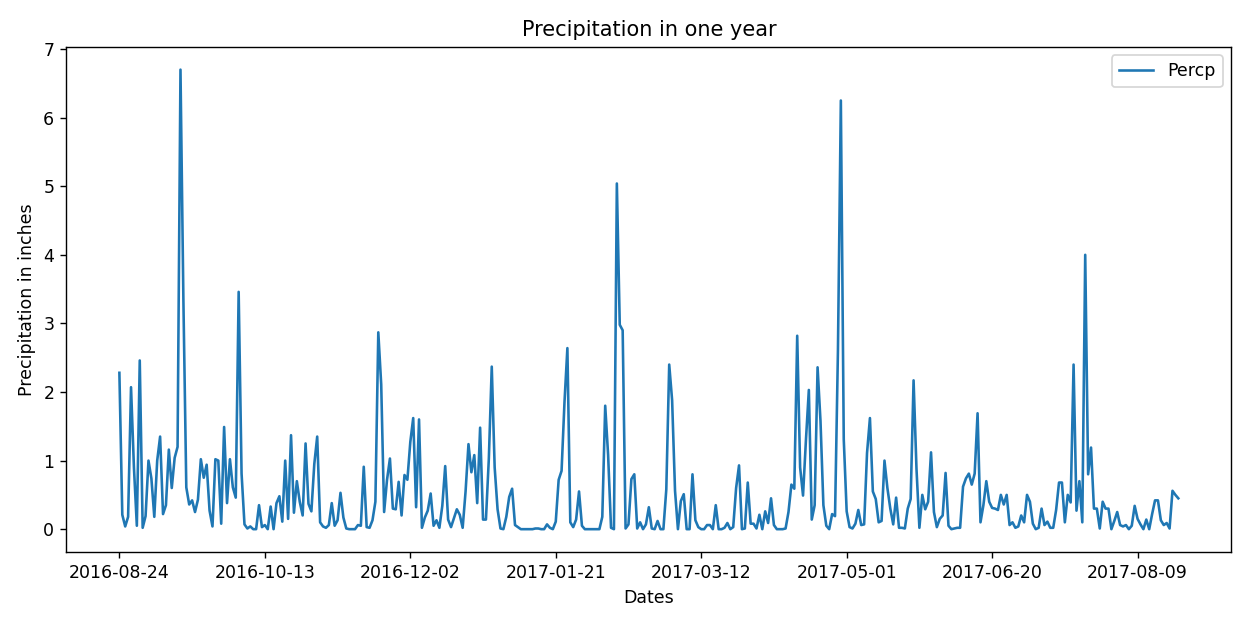

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
percp_df.plot("Date","Percp",figsize =(10,5))
plt.xlabel("Dates")
plt.ylabel("Precipitation in inches")
plt.title("Precipitation in one year")
plt.tight_layout()


In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary =percp_df.describe()
print("Summary of Precipitation data")
summary

Summary of Precipitation data


,Percp
count,365.000000
mean,0.517288
std,0.829196
min,0.000000
25%,0.040000
50%,0.250000
75%,0.650000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Use Inspector to print the column names and types
columns_meas = inspector.get_columns('station')

for c in columns_meas:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [19]:
#Display all the  Measurement class results in  a list
results_station = (
    session
    .query(Station.id,Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation)
    .all()
)
results_station 



[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [20]:
# Design a query to calculate the total number stations in the dataset
tot_station = session.query(Station).count()
print("Total number of stations is",tot_station)

Total number of stations is 9


In [21]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active = (
    session.query(Measurement.station,func.count(Measurement.id))
    .group_by(Measurement.station)
    .all()
)
for active in most_active:
    most_active_stn = (max(most_active))
print(f"Most active station ID is {most_active_stn[0]}")    

Most active station ID is USC00519523


In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps = [
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
active_temps = (
    session.query(*temps)
    .filter(Measurement.station == most_active_stn[0])
    .all()
)
print(f"lowest, highest, and average temperature are{active_temps} respectively")

lowest, highest, and average temperature are[(56.0, 85.0, 74.5436493068565)] respectively


In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps_active_year = (
            session.query(Measurement.date,func.max(Measurement.tobs))
            .filter(func.strftime(Measurement.date) > year_ago_date).\
                     filter(Measurement.station == most_active_stn[0])
                    .group_by(Measurement.date)
                    .all()
)
temps_active_year

[('2016-08-24', 79.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 84.0),
 ('2016-08-27', 81.0),
 ('2016-08-28', 80.0),
 ('2016-08-29', 79.0),
 ('2016-08-30', 78.0),
 ('2016-08-31', 78.0),
 ('2016-09-02', 81.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 84.0),
 ('2016-09-05', 84.0),
 ('2016-09-06', 78.0),
 ('2016-09-07', 76.0),
 ('2016-09-08', 79.0),
 ('2016-09-09', 77.0),
 ('2016-09-10', 78.0),
 ('2016-09-11', 83.0),
 ('2016-09-12', 78.0),
 ('2016-09-13', 77.0),
 ('2016-09-14', 77.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 81.0),
 ('2016-09-18', 81.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 77.0),
 ('2016-09-21', 79.0),
 ('2016-09-22', 79.0),
 ('2016-09-23', 80.0),
 ('2016-09-24', 83.0),
 ('2016-09-25', 82.0),
 ('2016-09-26', 78.0),
 ('2016-09-27', 78.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 82.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 79.0),
 ('2016-10-02', 81.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 80.0),
 ('2016-10-05', 80.0),
 ('2016-10-06', 80.0),
 ('2016-10-

<IPython.core.display.Javascript object>


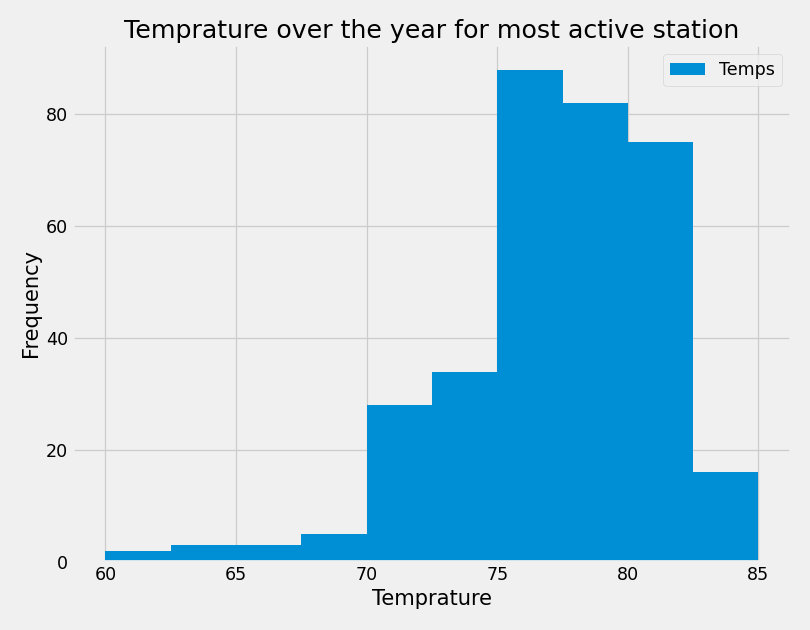

In [215]:
#plot the histogram
#putting into dataframe 
hist_df = pd.DataFrame(temps_active_year, columns = ["Dates","Temps"])
hist_df.plot(kind = "hist",figsize=(9,7))
plt.xlabel("Temprature")
plt.title("Temprature over the year for most active station")
plt.tight_layout()

# Close session

In [216]:
# Close Session
session.close()